### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

Answer:
<li>1- "Dependent Variable" is a variable being tested in an experiment.</li>
<li>2- "Independent Variable" is a variable whose value is changed in the experiment to test the effect of that on the "Dependent Variable" being tested.</li>
<li>3- Conclusion: In Stroop Effect Analysis,

Congruent and Incongruent are Dependent variables,
Color word and word text color are Independent variables</li>

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.


Answer:
<li>Null hypothesis represents a hypothesis that says there is no significant difference between the two variables in the hypothesis.</li>
<li>Alternative hypothesis is the inverse which says that there is a difference between the two variables.</li>

>Based on the definitions above,
<li> Null hypthesis: Incongurent population mean (ink color and word are different) is similar to Congurent population mean (ink color and word are same color) or less.</li>
<li>Alternative hypothesis: Incongruent population mean is greater than Congruent population mean</li>



>Notations:

$$H_0: μ_{incongruent} - μ_{congruent} \leq 0 $$


$$H_1: μ_{incongruent} - μ_{congruent} \gt 0$$

><li>As statistical test, bootstrapping can be used, bootstrapping is random sampling with repalcement it is used to infer about a population from sample data, can be modelled by resampling the sample data and performing inference about a sample from resampled data</li>

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('stroopdata.csv')
df.describe()

#cong_mean=df['Congruent'].mean()
#incong_mean=df['Incongruent'].mean()
#cong_median=df['Congruent'].median()
#incong_median=df['Incongruent'].median()
#cong_std=df['Congruent'].std()
#incong_std=df['Incongruent'].std()

#print('Congruent Median is {} sec, Incongruent Median is {} sec'.format(round(cong_median,2),round(incong_median,2)))
#print('Congruent Mean is {} sec, Incongruent Mean is {} sec'.format(round(cong_mean,2),round(incong_mean,2)))
#print('Congruent St.Deviation is {} sec, Incongruent St.Deviation is {} sec'.format(round(cong_std,2),round(incong_std,2)))


,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Answer:
>Cental Tendency Measures:
<li>Congruent Median is 14.36 sec, Incongruent Median is 21.02 sec</li>
<li>Congruent Mean is 14.05 sec, Incongruent Mean is 22.02 sec</li>

>Variance Measures:
<li>Congruent St.Deviation is 3.56 sec, Incongruent St.Deviation is 4.8 sec</li>

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

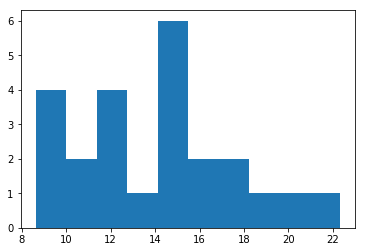

In [2]:
plt.hist(df.Congruent);

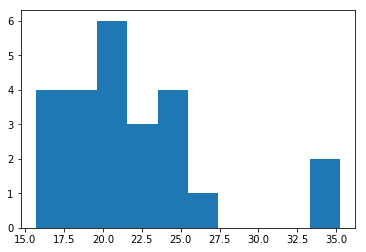

In [3]:
plt.hist(df.Incongruent);

Answer
>Congruent Data in the provided sample shows normal distribution.

>Incongruent Data in the provided sample shows right skewed with obvious outliers.

>The above plots are for very few sample data so they cannot be used for getting results based on them.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

0.0

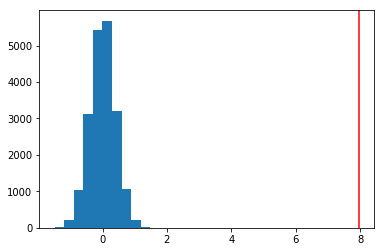

In [2]:
# Applying A/B Test

means_diff=[]

for _ in range(1000):
    bootsample=df.sample(150, replace=True)
    cong_mean=bootsample.Congruent.mean()
    incong_mean=bootsample.Incongruent.mean()
    means_diff.append(incong_mean-cong_mean)
    
# assuming that Congruent and Incongruent are similar, then mean difference will be 0 which is the Null hypothesis:
null_vals = np.random.normal(0, np.std(means_diff), 20000)
plt.hist(null_vals)
    
# plot original mean difference
obs_mean_diff=df.Incongruent.mean()-df.Congruent.mean()
plt.axvline(obs_mean_diff, color='red');

# calculating p-value which is the propability of having Alternative value when the null is true,
# in this case it is the propability of having means_diff greater than 0
p_value = (null_vals > obs_mean_diff).mean()
p_value
    

    

Answer:
><li>Type I error: calculated value (0) is very small (less than 0.05) which makes it unlikely to accept of the Null hypothesis.</li>
><li>Conclusion: Incongruent Mean is likely to be greater than Congruent Mean.</li>
><li>Observations prove that reading the color word when its text is written in a different color meaning (Incongruent) takes longer time when the color word is written in the same color meaning (Congruent).</li>

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Q1: What causes Stroop effect?

Answer: There are several theories used to explain the Stroop effect, some of them are explained simply as:

><li>Processing Speed:This theory suggests there is a lag in the brain's ability to recognize the color of the word since the brain reads words faster than it recognizes colors.</li>
><li>Selective Attention: The Selective Attention Theory that color recognition as opposed to reading a word, requires more attention, the brain needs to use more attention to recognize a color than to word encoding, so it takes a little longer.</li>
><li>Automaticity: This theory is the most common theory of the Stroop effect.It suggests that since recognizing colors is not an "automatic process" there is hesitancy to respond; whereas, the brain automatically understands the meaning of words as a result of habitual reading.</li>


Q2: Stroop Effect Alternatives

>Answer: Stroop Effect has been modified to include other sensory modalities and variables, for example:
><li>Warped words:
The warped words Stroop effect produces the same findings similar to the original Stroop effect. Much like the Stroop task, the printed word's color is different from the ink color of the word; however, the words are printed in such a way that it is more difficult to read (typically curved-shaped).The idea here is the way the words are printed slows down both the brain's reaction and processing time, making it harder to complete the task.</li>


><li>Emotional:
The emotional Stroop effect serves as an information processing approach to emotions. In an emotional Stroop task, an individual is given negative emotional words like "grief," "violence," and "pain" mixed in with more neutral words like "clock," "door," and "shoe". Just like in the original Stroop task, the words are colored and the individual is supposed to name the color. Research has revealed that individuals that are depressed are more likely to say the color of a negative word slower than the color of a neutral word. While both the emotional Stroop and the classic Stroop involve the need to suppress irrelevant or distracting information, there are differences between the two. The emotional Stroop effect emphasizes the conflict between the emotional relevance to the individual and the word; whereas, the classic Stroop effect examines the conflict between the incongruent color and word.</li>


References:
<li>https://www.thoughtco.com/independent-and-dependent-variables-differences-606115</li>
<li>https://study.com/academy/lesson/what-is-a-null-hypothesis-definition-examples.html</li>
<li>https://en.wikipedia.org/wiki/Stroop_effect</li>